In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow --user

  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached grpcio-1.59.2-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [30]:
encoding_dim = 64

In [31]:
input_img = Input(shape = (784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [32]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

 ## Load mnist dataset

In [33]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f"x_train shape = {x_train.shape}")
print(f"x_test shape = {x_test.shape}")

x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit data

In [34]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=15, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
4000/4000 [==============================] - 8s 2ms/step - loss: 0.6931 - val_loss: 0.6908
Epoch 2/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.6885 - val_loss: 0.6859
Epoch 3/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.6829 - val_loss: 0.6792
Epoch 4/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.6747 - val_loss: 0.6689
Epoch 5/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.6620 - val_loss: 0.6529
Epoch 6/50
4000/4000 [==============================] - 8s 2ms/step - loss: 0.6422 - val_loss: 0.6284
Epoch 7/50
4000/4000 [==============================] - 8s 2ms/step - loss: 0.6131 - val_loss: 0.5937
Epoch 8/50
4000/4000 [==============================] - 11s 3ms/step - loss: 0.5738 - val_loss: 0.5492
Epoch 9/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5266 - val_loss: 0.4991
Epoch 10/50
4000/4000 [==============================] - 12s 3ms/step - loss: 0.

In [35]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 995us/step


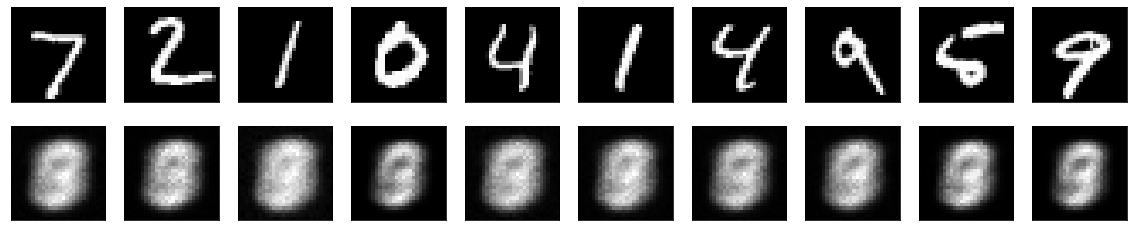

In [36]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()